In [1]:
from my_library.algorithms.birch import birch as bir

In [2]:
bi = bir.birch('csv_hcb_member_profiling_preprocessed.csv')

In [3]:
bi.get_shape()

(10000, 55)

In [4]:
folds = 5
params_grid = {"branching_factor": [50, 100, 200, 300, 400, 500],
               "n_clusters": list(range(2, 10)),
               "threshold": [0.2, 0.3, 0.4, 0.5]}

In [11]:
a, b, c = bi.randomizedSearchCV_birch(params_grid, folds, n_iter=10, rand_sample_prop=0.2)

In [12]:
branching_factor = b['branching_factor']
n_clusters = b['n_clusters']
threshold = b['threshold']

In [13]:
print("recommended parameters: branching_factor = {}, n_clusters = {}, threshold = {}".format(branching_factor, n_clusters, threshold))

recommended parameters: branching_factor = 400, n_clusters = 3, threshold = 0.2


In [14]:
bi.get_training_history(c)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_threshold,param_n_clusters,param_branching_factor,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.297899,0.074920,0.035894,0.002417,0.2,3,400,"{'threshold': 0.2, 'n_clusters': 3, 'branching...",0.579063,0.528022,0.600710,0.554625,0.549718,0.562428,0.025093,1
1,0.187972,0.000831,0.033424,0.001750,0.3,3,200,"{'threshold': 0.3, 'n_clusters': 3, 'branching...",0.579063,0.528022,0.600710,0.554625,0.549718,0.562428,0.025093,1
2,0.235278,0.002903,0.035618,0.000892,0.3,4,500,"{'threshold': 0.3, 'n_clusters': 4, 'branching...",0.552045,0.555657,0.539676,0.516071,0.513301,0.535350,0.017707,10
3,0.224094,0.001711,0.035504,0.001072,0.5,6,300,"{'threshold': 0.5, 'n_clusters': 6, 'branching...",0.545627,0.561472,0.548432,0.519983,0.541323,0.543367,0.013487,7
4,0.230082,0.004107,0.038827,0.004254,0.5,9,300,"{'threshold': 0.5, 'n_clusters': 9, 'branching...",0.525366,0.561275,0.525565,0.532997,0.536549,0.536350,0.013187,8
5,0.233489,0.012178,0.052459,0.032587,0.5,3,300,"{'threshold': 0.5, 'n_clusters': 3, 'branching...",0.579063,0.528022,0.600710,0.554625,0.549718,0.562428,0.025093,1
6,0.162141,0.002260,0.027793,0.000915,0.2,9,50,"{'threshold': 0.2, 'n_clusters': 9, 'branching...",0.525366,0.561275,0.525565,0.532997,0.536549,0.536350,0.013187,8
7,0.197474,0.006183,0.034160,0.001619,0.2,7,200,"{'threshold': 0.2, 'n_clusters': 7, 'branching...",0.556232,0.569516,0.545857,0.532075,0.544510,0.549638,0.012551,5
8,0.259733,0.005116,0.035683,0.001653,0.4,3,400,"{'threshold': 0.4, 'n_clusters': 3, 'branching...",0.579063,0.528022,0.600710,0.554625,0.549718,0.562428,0.025093,1
9,0.257699,0.004349,0.037065,0.001109,0.2,7,400,"{'threshold': 0.2, 'n_clusters': 7, 'branching...",0.556232,0.569516,0.545857,0.532075,0.544510,0.549638,0.012551,5


In [15]:
clusters = bi.birch(branching_factor, n_clusters, threshold, 0.3)

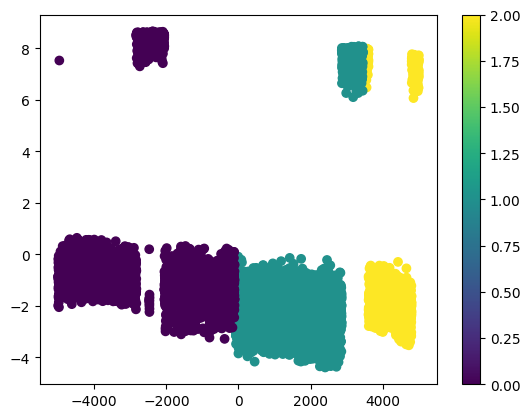

In [16]:
bi.scatter_plot(bi.pca(clusters))

In [17]:
bi.get_davies_bouldin_score(clusters)

0.5000855556983276

In [18]:
bi.get_silhouette_score(clusters)

0.5335201161101759

In [20]:
bi.get_cluster_distribution(clusters)

,cluster,count,percentage
0,0,4894,48.94
1,1,3552,35.52
2,2,1554,15.54


In [21]:
bi.get_cluster_centers(clusters)

,Unnamed: 0,spclty_visit_cnt_processed,ucc_mcable_visit_count_processed,srv_copay_amt_processed,aetna_num_children_modif_processed,strat_score_value_processed,ucc_visit_cnt_processed,first_pulse_processed,pcp_visit_cnt_processed,age_nbr_processed,op_rehab_visit_cnt_processed,final_future_tenure_processed,hosop_lab_visit_cnt_processed,income_processed,hosop_rad_visit_cnt_processed,op_rehab_allowed_amt_processed,final_total_tenure_processed,medical_allowed_pmpm_processed,rx_mths_processed,complex_chronic_common_flag_processed,relationship_processed,active_medical_ind_ind,hyc_missing_ind,hyc_ind,a2020_rx_ind_ind,cvs_rx_inrange_ind_ind,marital_ind,ctd_missing_ind,dep_missing_ind,alg_missing_ind,active_dental_ind_ind,cvs_mc_inrange_ind_ind,a2020_medicare_ind_ind,high_pulse_missing_ind,high_pulse_ind,active_pharmacy_ind_ind,active_medicare_ind_ind,hyp_missing_ind,hyp_ind,cvs_hh_inrange_ind_ind,dia_missing_ind,a2020_dental_ind_ind,lbp_missing_ind,obe_missing_ind,anx_missing_ind,ngd_missing_ind,ngd_ind,pcp_flag_ind,gender_cd_ind,urbsubr_R,urbsubr_S,urbsubr_U,lob_CFI,lob_CSI,lob_ME,cluster
0,7552.5,-0.233073,0.066071,-0.194303,0.334744,-0.552304,0.055886,-0.516438,-0.185222,-0.626827,0.085439,-0.093977,-0.180385,-0.035334,-0.200518,0.139905,-0.129437,-0.171533,-0.070331,0.443016,-0.586136,0.008447,-0.038265,-0.492069,-0.069635,-0.048692,0.036650,-0.038265,-0.038265,-0.038265,0.067440,0.054582,-0.303810,-0.038265,-0.294576,-0.165022,-0.287726,-0.038265,-0.507492,-0.065487,-0.038265,-0.007288,-0.038265,-0.038265,-0.038265,-0.038265,-0.239412,0.161231,0.059687,-0.048137,-0.010733,0.059360,0.004525,0.242921,-0.304180,0
1,3329.5,0.316931,-0.095141,0.324553,-0.527779,0.640896,-0.101816,0.643440,0.313987,0.742985,-0.075516,0.170110,0.267838,-0.109993,0.283788,-0.120398,0.164724,0.226181,0.165666,-0.533854,-0.071237,-0.037343,-0.016931,0.707527,0.164914,0.003697,0.227583,-0.016931,-0.016931,-0.016931,-0.139335,-0.053446,0.602916,-0.016931,0.329608,0.327543,0.567029,-0.016931,0.724275,0.059862,-0.016931,0.029930,-0.016931,-0.016931,-0.016931,-0.016931,0.348875,-0.268023,0.013472,0.051750,-0.006913,-0.047074,-0.020966,-0.473111,0.603353,1
2,776.5,0.009601,0.009388,-0.129919,0.152144,0.274462,0.056721,0.155693,-0.134368,0.275810,-0.096467,-0.092863,-0.044116,0.362689,-0.017169,-0.165408,0.031123,0.023224,-0.157170,-0.174951,2.008741,0.058752,0.159207,-0.067536,-0.157645,0.144896,-0.635612,0.159207,0.159207,0.159207,0.106090,-0.049733,-0.421305,0.159207,0.174316,-0.228968,-0.389932,0.159207,-0.057246,0.069410,0.159207,-0.045458,0.159207,0.159207,0.159207,0.159207,-0.043451,0.104860,-0.218765,0.033312,0.049603,-0.079343,0.033673,0.316368,-0.421140,2


In [22]:
bi.get_scores(clusters)

,silhouette_score,davies_bouldin_score
0,0.53352,0.500086
